# Intro
This section goes through basic usage examples.

## Setting-up a Network object

In [1]:
from genet import Network

To initialise an empty `Network`, you need a coordinate system. We've gone with the British National Grid.

In [2]:
n = Network(epsg='epsg:27700')

You can get quick stats on the `Network` by calling `n.print()` method or just running the cell with network object.

In [3]:
n

<Network instance at 4771911216: with 
graph: Name: Network graph
Type: MultiDiGraph
Number of nodes: 0
Number of edges: 0
 and 
schedule Schedule:
Number of services: 0
Number of routes: 0
Number of stops: 0

In [4]:
n.print()

Graph info: Name: Network graph
Type: MultiDiGraph
Number of nodes: 0
Number of edges: 0
 
Schedule info: Schedule:
Number of services: 0
Number of routes: 0
Number of stops: 0


Right now the `Network` is empty. You can fill it in with MATSim network data, using Open Street Map (OSM) data (Please refer to notebooks on reading data) or we can add links ourselves. A single link or a few links at once.

In [5]:
link_id = n.add_link(
    link_id='1', 
    u='A', 
    v='B', 
    attribs={'modes': ['car', 'walk']}
)

2021-03-15 10:17:12,391 - Added Link with index 1, from node:A to node:B, under multi-index:0, and data={'modes': ['car', 'walk'], 'from': 'A', 'to': 'B', 'id': '1'}


In [6]:
link_id

'1'

Even though you specify a link id in this method, this id can change if there already exists a link with that id in the `Network`. This is why this method returns the link id under which the link was added. Let's try to add the same link again.

In [7]:
link_id = n.add_link(
    link_id='1', 
    u='A', 
    v='B', 
    attribs={'modes': ['car', 'walk']}
)

2021-03-15 10:17:12,405 - Generated 1 link ids.
2021-03-15 10:17:12,410 - Generated link id 0.
2021-03-15 10:17:12,410 - `1` already exists. Generated a new unique_index: `0`
2021-03-15 10:17:12,417 - Added Link with index 0, from node:A to node:B, under multi-index:1, and data={'modes': ['car', 'walk'], 'from': 'A', 'to': 'B', 'id': '0'}


In [8]:
link_id

'0'

If you are adding many edges between the same two nodes you can also specify which multi index you want a link to use

In [9]:
link_id = n.add_link(
    link_id='1', 
    u='A', 
    v='B', 
    attribs={'modes': ['car', 'walk']},
    multi_edge_idx=5
)

2021-03-15 10:17:12,433 - Generated 1 link ids.
2021-03-15 10:17:12,436 - Generated link id 2.
2021-03-15 10:17:12,437 - `1` already exists. Generated a new unique_index: `2`
2021-03-15 10:17:12,443 - Added Link with index 2, from node:A to node:B, under multi-index:5, and data={'modes': ['car', 'walk'], 'from': 'A', 'to': 'B', 'id': '2'}


To add several links it is faster to use the `add_links` method. This expects a dictionary with keys referring to _desired_ link ids and the values being attribute dictionaries saved on those links. At the minimum each attribute dictionary needs a `'from'` and `'to'` key referring to from and to nodes the link is connecting.

In [10]:
reindexing_dict, links_and_attributes = n.add_links(
    links_and_attributes= {
        '1' : {'from': 'A', 'to': 'B', 'modes': ['bike']},
        '10': {'from': 'B', 'to': 'A', 'modes': ['bike']}
    }
)

2021-03-15 10:17:12,476 - Generated 1 link ids.
2021-03-15 10:17:12,482 - Added 2 links


This method also checks for links with clashing indices and returns a dictionary showing which ids we're reindex and what their new indices are, as well as an updated links_and_attributes dictionary showing final link attributes added to the `Network`.

In [11]:
reindexing_dict

{'1': '3'}

In [12]:
links_and_attributes

{'3': {'from': 'A', 'to': 'B', 'modes': ['bike'], 'id': '3'},
 '10': {'from': 'B', 'to': 'A', 'modes': ['bike'], 'id': '10'}}

Each node should have a spatial reference. For now we worked with nodes `A` and `B`, which dont have this information. To check what information is saved under nodes or links 

In [13]:
n.node_attribute_summary(data=False)

attribute


In [14]:
n.link_attribute_summary(data=True)

attribute
├── modes: ['car', 'walk', 'bike']
├── from: ['A', 'B']
├── to: ['A', 'B']
└── id: ['1', '0', '10', '3', '2']


To add spatial information to nodes we can use `apply_attributes_to_node` or `apply_attributes_to_nodes` methods. We have two nodes so let's use the latter. GeNet expects values `x` and `y` in the coordinate system declared at the time of initiating the `Network`.

In [15]:
n.apply_attributes_to_nodes(new_attributes={
    'A': {'x': 528704.1425925883, 'y': 182068.78193707118},
    'B': {'x': 528835.203274008, 'y': 182006.27331298392}
})

2021-03-15 10:17:12,521 - Changed Node attributes for 2 nodes


In [16]:
n.node_attribute_summary(data=False)

attribute
├── x
└── y


Now that we have spatial information for the nodes, we can do a quick plot of the `Network`.

/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


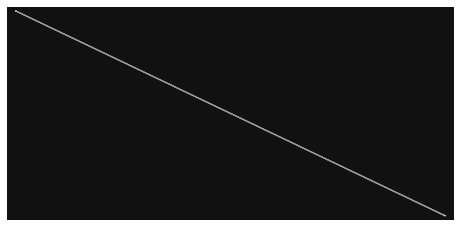

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10d4edfd0>)

In [17]:
n.plot()

The plots get much more interesting the more links you have in the `Network`. Any additions and changes we made are recorded in the `Network`s changelog.

In [18]:
n.change_log.head(10)

,timestamp,change_event,object_type,old_id,new_id,old_attributes,new_attributes,diff
0,2021-03-15 10:17:12,add,link,None,1,None,"{'modes': ['car', 'walk'], 'from': 'A', 'to': ...","[(add, , [('modes', ['car', 'walk']), ('from',..."
1,2021-03-15 10:17:12,add,link,None,0,None,"{'modes': ['car', 'walk'], 'from': 'A', 'to': ...","[(add, , [('modes', ['car', 'walk']), ('from',..."
2,2021-03-15 10:17:12,add,link,None,2,None,"{'modes': ['car', 'walk'], 'from': 'A', 'to': ...","[(add, , [('modes', ['car', 'walk']), ('from',..."
3,2021-03-15 10:17:12,add,link,None,3,None,"{'from': 'A', 'to': 'B', 'modes': ['bike'], 'i...","[(add, , [('from', 'A'), ('to', 'B'), ('modes'..."
4,2021-03-15 10:17:12,add,link,None,10,None,"{'from': 'B', 'to': 'A', 'modes': ['bike'], 'i...","[(add, , [('from', 'B'), ('to', 'A'), ('modes'..."
5,2021-03-15 10:17:12,modify,node,A,A,{},"{'x': 528704.1425925883, 'y': 182068.78193707118}","[(add, , [('x', 528704.1425925883), ('y', 1820..."
6,2021-03-15 10:17:12,modify,node,B,B,{},"{'x': 528835.203274008, 'y': 182006.27331298392}","[(add, , [('x', 528835.203274008), ('y', 18200..."


Another important part of the `Network` is the `Schedule` element describing public transit.

In [19]:
from genet import Schedule

In [20]:
n.schedule.print()

Schedule:
Number of services: 0
Number of routes: 0
Number of stops: 0


It is initiated empty with a `Network`. Right now, GeNet does not have nice methods to add and change Schedules. You can generate a `Schedule` using different `Schedule` elements: `Service`, `Route` and `Stop`, or by reading GTFS data (Please refer to notebooks on reading data).

In [21]:
from genet import Service, Route, Stop

Each `Schedule` consists of `Services`. A `Service` corresponds to a specific transit line, for example the Piccadilly London Underground line. Each `Service` will have a number of `Routes` which are characterised by an ordered sequence of `Stop`s. For a network to be a valid multimodal network each `Route` needs to have a valid reference to `Network` links. Let's create a `Schedule` with a bus `Service`.

In [22]:
s = Schedule(epsg='epsg:27700', services=[
        Service(id='service1',
                routes=[
                    Route(id='1', route_short_name='route1', mode='bus',
                          stops=[
                              Stop(id='0', x=529455.7452394223, y=182401.37630677427, epsg='epsg:27700', linkRefId='0'),
                              Stop(id='1', x=529350.7866124967, y=182388.0201078112, epsg='epsg:27700', linkRefId='1')],
                          trips={'trip_id': ['route1_04:40:00'],
                                 'trip_departure_time': ['04:40:00'],
                                 'vehicle_id': ['veh_bus_0']},
                          arrival_offsets=['00:00:00', '00:02:00'],
                          departure_offsets=['00:00:00', '00:02:00'],
                          route=['0', '1']),
                    Route(id='2', route_short_name='route2', mode='bus',
                          stops=[
                              Stop(id='1', x=529455.7452394223, y=182401.37630677427, epsg='epsg:27700', linkRefId='1'),
                              Stop(id='2', x=529350.7866124967, y=182388.0201078112, epsg='epsg:27700', linkRefId='2')],
                          trips={'trip_id': ['route2_05:40:00'],
                                 'trip_departure_time': ['05:40:00'],
                                 'vehicle_id': ['veh_bus_1']},
                          arrival_offsets=['00:00:00', '00:03:00'],
                          departure_offsets=['00:00:00', '00:05:00'],
                          route=['1', '2'])
                ])
    ])

In [23]:
s.print()

Schedule:
Number of services: 1
Number of routes: 2
Number of stops: 3


/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/kasia.kozlowska/pycharm_venvs/genet/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


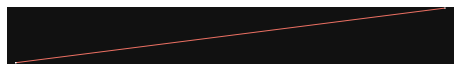

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10e32c748>)

In [24]:
s.plot()

You can replace the `Network` schedule by your new `Schedule`.

In [25]:
n.schedule = s

In [26]:
n.print()

Graph info: Name: Network graph
Type: MultiDiGraph
Number of nodes: 2
Number of edges: 5
Average in degree:   2.5000
Average out degree:   2.5000 
Schedule info: Schedule:
Number of services: 1
Number of routes: 2
Number of stops: 3
